# Timing the Market
<h3>Jamie Gibbs and Ben Custer </h3>

<h3>CS595 Data Science with Python </h3>

References:

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/momentum-oscillator
https://www.investopedia.com/ask/answers/121914/what-are-most-common-momentum-oscillators-used-forex-trading.asp
https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/RSI
https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/macd
https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/fast-stochastic
https://www.quora.com/What-is-the-difference-between-a-bear-market-and-a-bull-market

Our project seeks to provide investors with tools to buy and sell stocks based four different momentum oscillators:

1. Relative Strength Index (RSI) 
2. Moving Average Convergence/Divergence (MACD)
3. Stochastics model
4. Force Index

<h3>How does this benefit the business it is from?

Our momentum oscillators have the potential to help investors make money by using past trends to predict future gains or losses in the market.  While not a full proof plan the data provides ways for decision makers to analyze trends in the performance of a stock.</h3>  


  

What is a momentum oscilator?

A Momentum Oscillator measures the amount that a security’s price has changed over a given period of time. The Momentum Oscillator is the current price divided by the price of a previous period, and the quotient is multiplied by 100. The result is an indicator that oscillates around 100. Values less than 100 indicate negative momentum, or decreasing price, and vice versa.

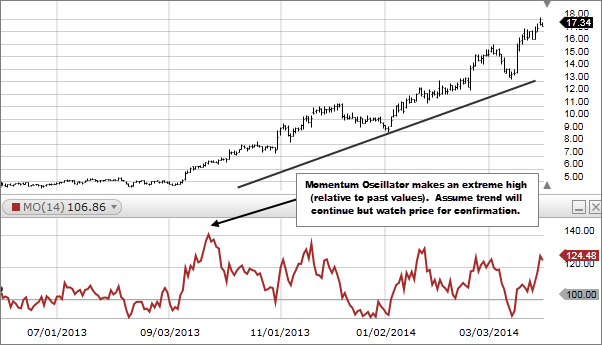

How this indicator works

If the Momentum Oscillator reaches extremely high or low values (relative to its historical values), you should assume a continuation of the current trend and make a decision to buy or sell based on this indicator.

We will explore data to see if a single oscillator or combination of oscillators works best to make money.  We seek to define the best decision points to buy or sell and what time periods of data produce the best results.

<h3>Relative Strength Index (RSI) </h3>

The Relative Strength Index (RSI), developed by J. Welles Wilder, is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30. Signals can be generated by looking for divergences and failure swings. RSI can also be used to identify the general trend.

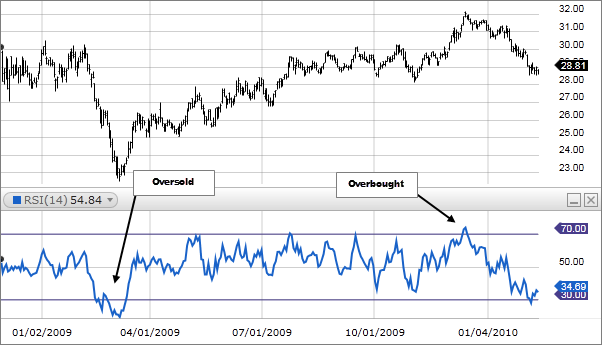

RSI is considered overbought when above 70 and oversold when below 30. These traditional levels can also be adjusted if necessary to better fit the security. For example, if a security is repeatedly reaching the overbought level of 70 you may want to adjust this level to 80.

Note: During strong trends, the RSI may remain in overbought or oversold for extended periods.

RSI also often forms chart patterns that may not show on the underlying price chart, such as double tops and bottoms and trend lines. Also, look for support or resistance on the RSI.

<h3>What are the best trigger points? Are 30 and 80 the best trigger points? Does the market trend (Bullish or Bearish) affect the oscillators?  Do different windows of time affect the returns? </h3>

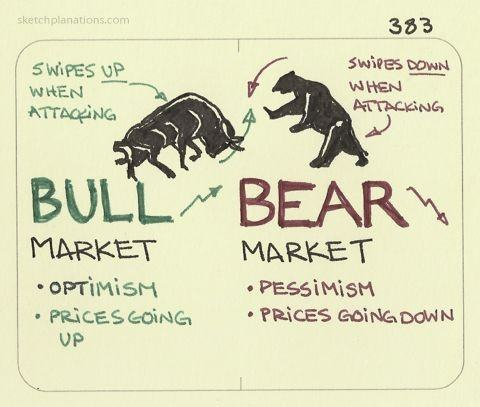

<h3>First, let's conduct some exploratory data analysis (EDA) and modeling. It is important to note that we used 4 of the 5 features in our project</h3>

In [1]:
#!pip install pandas_datareader

In [2]:
#General imports
import numpy as np
import pandas as pd
#pd.show_versions(as_json=False)
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import plotly.offline as py_offline
import plotly.graph_objs as go
import warnings
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Get the data
#RSI G
# Window length for moving average
window_length = 14

# Dates
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 31)

# Get data
data = web.DataReader('FB', 'morningstar', start, end)
df2= pd.DataFrame(data)

# Get just the close
close = data['Close']

# Get the difference in price from previous step
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

In [4]:
df2.head()

Close      High      Low    Open    Volume
Symbol Date                                                   
FB     2016-01-01  104.66  104.6600  104.660  104.66         0
       2016-01-04  102.22  102.2400   99.750  101.95  37912403
       2016-01-05  102.73  103.7099  101.665  102.89  23258238
       2016-01-06  102.97  103.7700  100.900  101.13  25096183
       2016-01-07   97.92  101.4300   97.300  100.50  45172906

In [5]:
df2.tail()

Close     High       Low     Open    Volume
Symbol Date                                                    
FB     2016-12-26  117.27  117.270  117.2700  117.270         0
       2016-12-27  118.01  118.680  116.8640  116.960  12051481
       2016-12-28  116.92  118.250  116.6500  118.190  12087377
       2016-12-29  116.35  117.531  116.0600  117.000   9934873
       2016-12-30  115.05  116.830  114.7739  116.595  18684106

In [6]:
df2.keys()

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [7]:
print(df2.dtypes)

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


In [8]:
df2.describe()

,Close,High,Low,Open,Volume
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,116.880153,117.899879,115.735165,116.924179,2.463879e+07
std,8.960496,8.738624,9.242345,8.937425,1.530510e+07
min,94.160000,94.970000,89.370000,92.830000,0.000000e+00
25%,112.180000,112.750000,110.270000,111.660000,1.566898e+07
50%,117.700000,118.665000,116.730000,117.760000,2.081464e+07
75%,123.890000,124.580000,122.850000,123.600000,2.959351e+07
max,133.280000,133.500000,132.220000,133.500000,1.074753e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcba5f42eb8>,
      dtype=object)

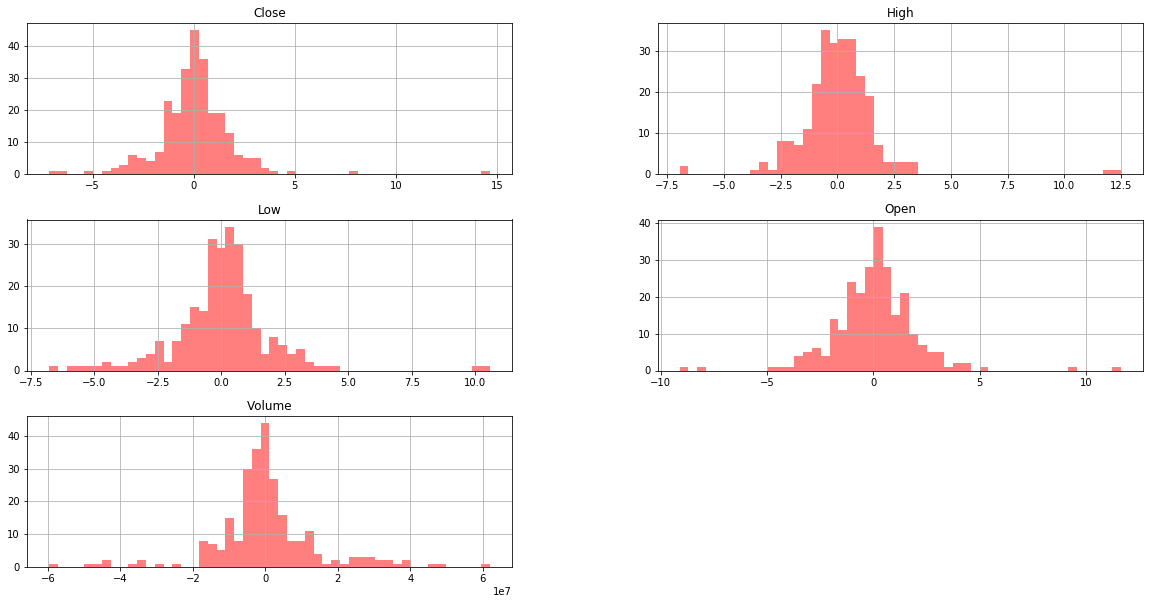

In [9]:
df2.diff().hist(color='red', alpha=0.5, bins=50, figsize=(20,10))

Text(0,0.5,'Price')

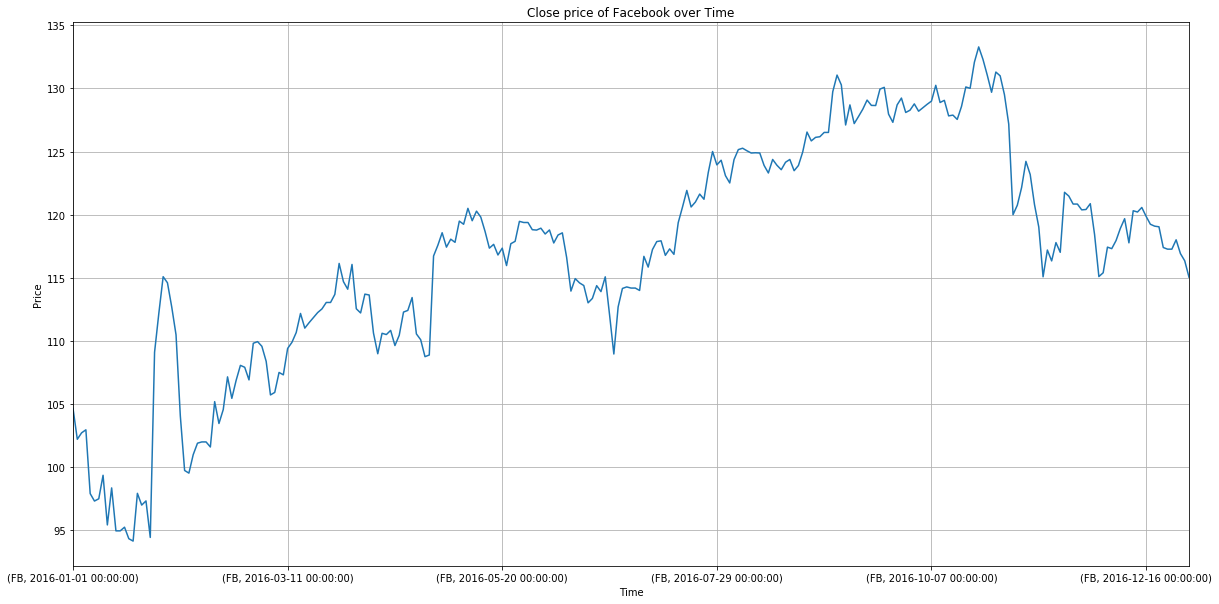

In [10]:
ax = df2['Close'].plot(figsize=(20,10),grid = True, title='Close price of Facebook over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Price')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcba4de3b38>,
      dtype=object)

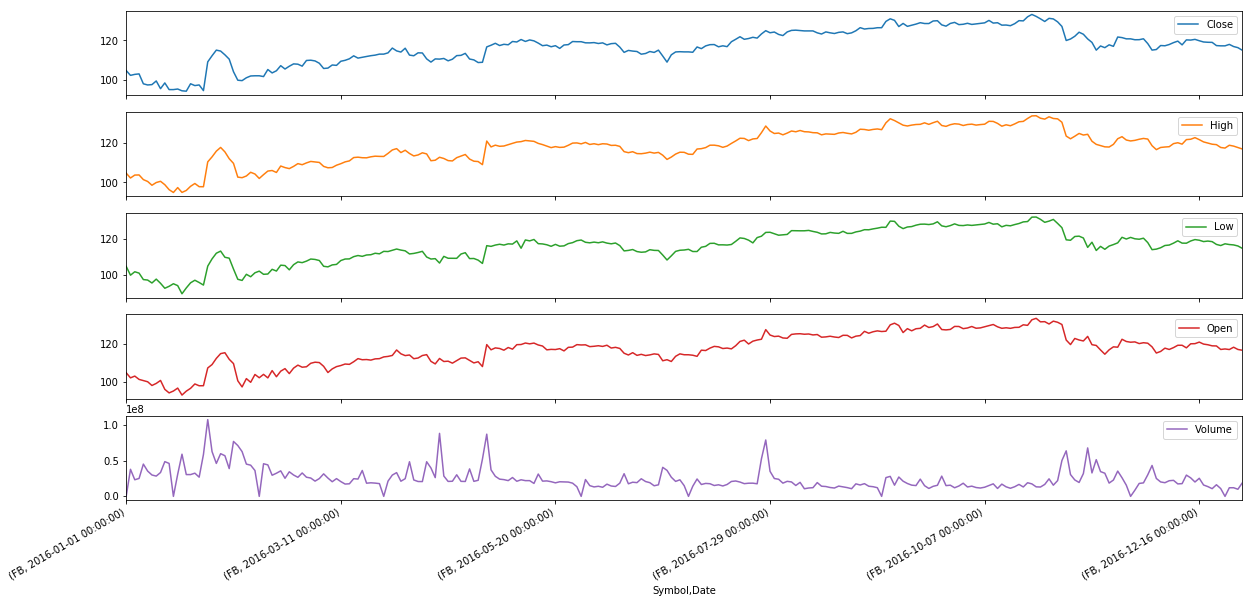

In [11]:
df2.plot(subplots=True, figsize=(20,10))

<h3>Next, let's look at the RSI Oscillator with the textbook answers of above 70 being overbought and under 30 being under bought to determine what traditional sources indicate buy and sell points. </h3>

<h3>We will keep a window length of 14. </h3>

In [12]:
#RSI Oscillator with the textbook answers of above 70 being overbought and under 30 being underbought to determine what traditional 
#sources indicate buy and sell points.
df3=df2
# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the EWMA
roll_up1 = pd.stats.moments.ewma(up, window_length)
roll_down1 = pd.stats.moments.ewma(down.abs(), window_length)

# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

# Calculate the SMA
roll_up2 = pd.rolling_mean(up, window_length)
roll_down2 = pd.rolling_mean(down.abs(), window_length)

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

df2['RSI1']=RSI2
df2['RSI2']=RSI1
df2=df2.dropna(axis=0)

#find the rows that only have rsi between RSI 30 and 70 for Simple Moving Average
SMA=[]
EMA=[]
DatesSMA=[]
DatesEMA=[]
#find the rows that only have rsi between RSI 30 and 70 for Simple Moving Average
for index, row in df2.iterrows():
    if row['RSI1']>70 and row['RSI1']<30:
        continue
    elif row['RSI1']>30 and row['RSI1']<70:
        DatesSMA.append(index[1:])
        SMA.append(row['Close'])
#find the rows that only have rsi between RSI 30 and 70 for Exponential Weighted Moving Average
for index, row in df2.iterrows():
    if row['RSI2']>70 and row['RSI2']<30:
        continue
    elif row['RSI2']>30 and row['RSI2']<70:
        DatesEMA.append(index[1:])
        EMA.append(row['Close'])

#find the total percentage returns for the year

df3['Actual_Return']=((df3['Close']-df3['Close'].shift(1))/(df3['Close'])*100)
Total_Returns_year=df3['Actual_Return']
Total_Returns_year[np.isnan(Total_Returns_year)]=3.5
#print(Total_Returns_year)
print("Total return for year",sum(Total_Returns_year),"%")

Total return for year 9.146899501061057 %


<h3>Before the oscillator this is what our daily returns looked like. Notice the average for the time period 9.14%.  Can we beat that with the RSI oscillator? </h3>

Text(0,0.5,'Percent')

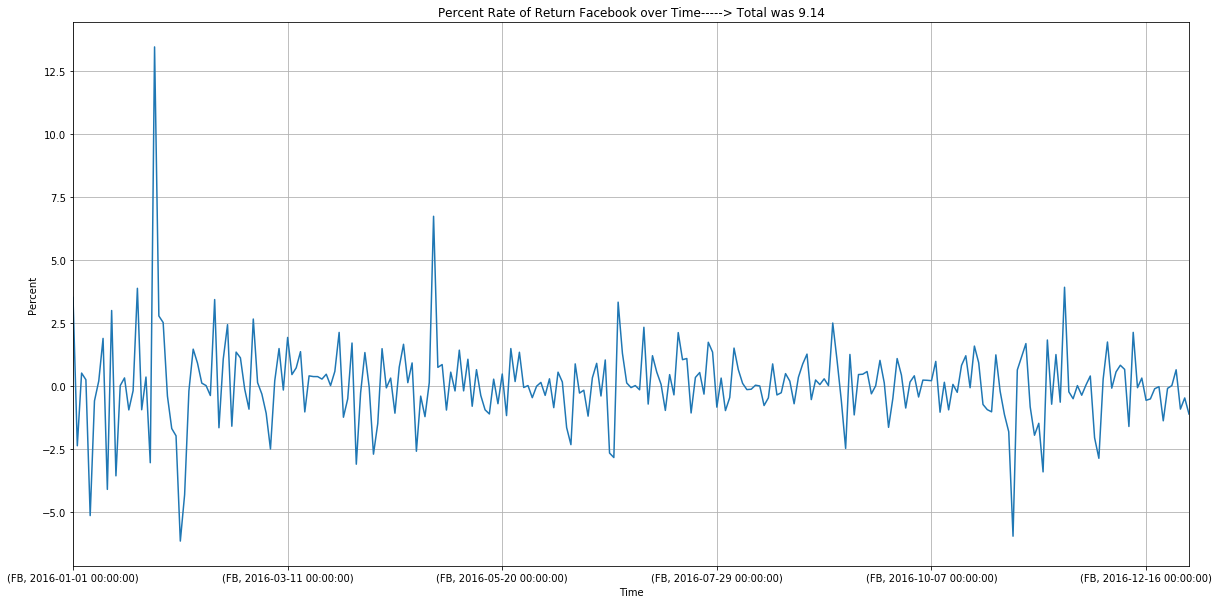

In [13]:
ax1 = df3['Actual_Return'].plot(figsize=(20,10),grid = True, title='Percent Rate of Return Facebook over Time-----> Total was 9.14')
ax1.set_xlabel('Time')
ax1.set_ylabel('Percent')

<h3>Estimated Weighted Moving Average and Simple Moving Average </h3>

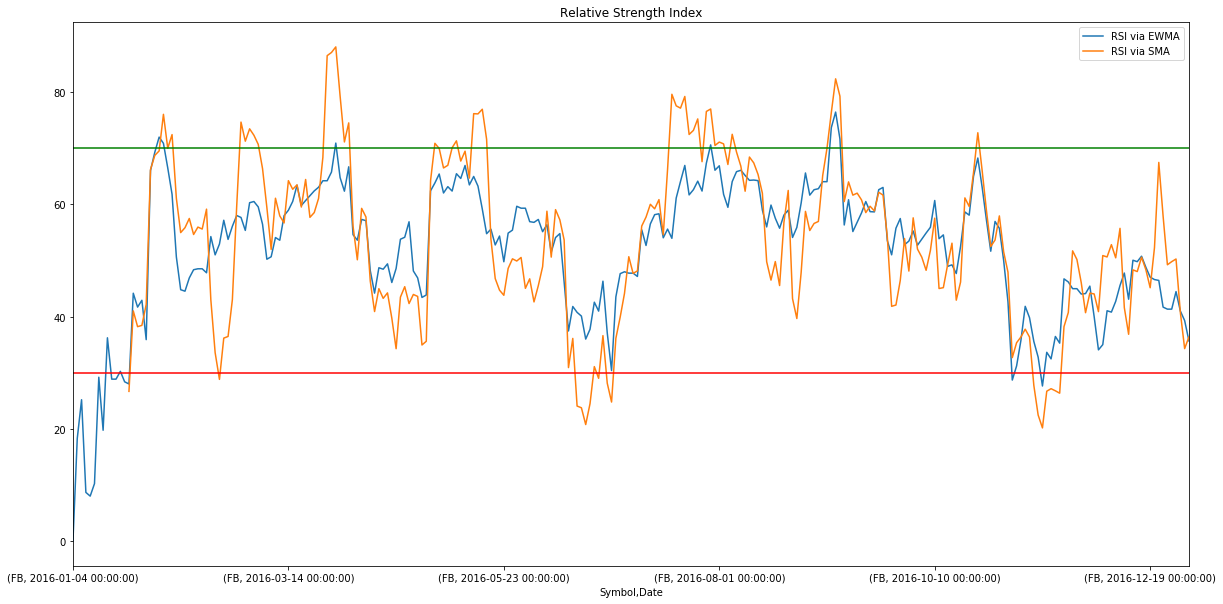

In [14]:
#plot the EWMA and SMA with trigger points of 70 and 30
ax3 = RSI1.plot(title='Relative Strength Index',figsize = (20, 10))
ax4 = RSI2.plot(figsize = (20, 10))
plt.legend(['RSI via EWMA', 'RSI via SMA'])
ax3.axhline(color = 'green', y=70)
ax4.axhline(color ='r',y=30)
plt.show()

In [15]:
#total returns for RSI based on SMA
SMA_Tot_Return=[]
for i in range(len(SMA)-1):
    SMA_Tot_Return.append((SMA[i+1]-SMA[i])/SMA[i]*100)
#print(SMA_Tot_Return)
print("Total return for year SMA",sum(SMA_Tot_Return),"%")

Total return for year SMA 19.335691534369708 %


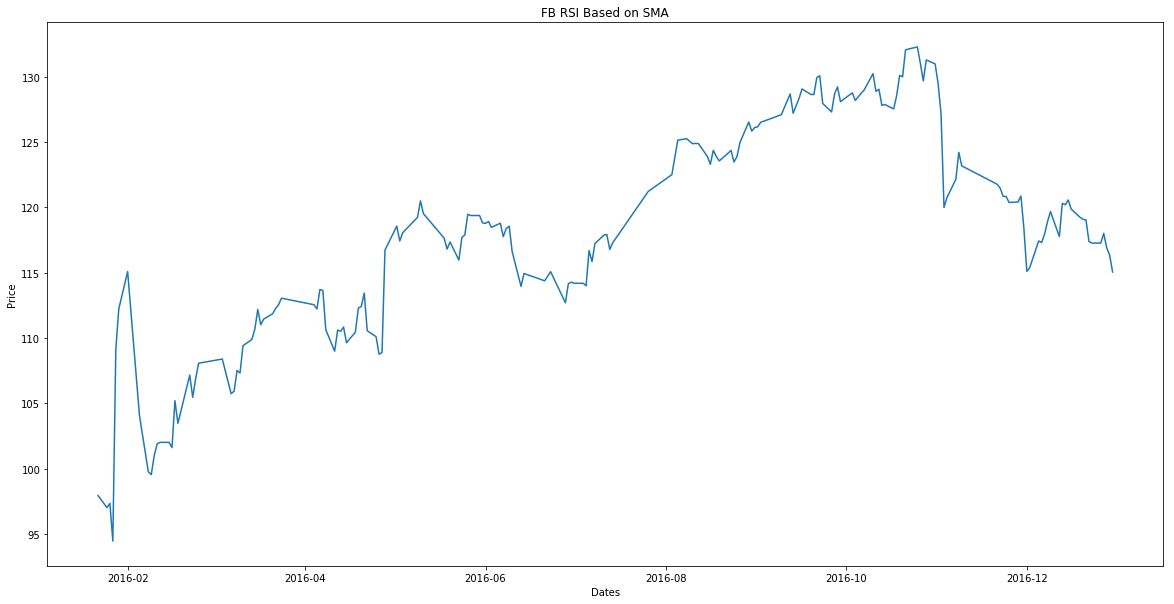

In [16]:
# Compare graphically
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB RSI Based on SMA")
plt.plot(DatesSMA,SMA)
plt.show()

In [17]:
#total returns for RSI based on EWMA
#print(EMA)
EMA_Tot_Return=[]
#print(EMA)
for i in range(len(EMA)-1):
    EMA_Tot_Return.append((EMA[i+1]-EMA[i])/EMA[i]*100)
#print(EMA_Tot_Return)
print("Total return for year EWMA",sum(EMA_Tot_Return),"%")

Total return for year EWMA 19.317274349975673 %


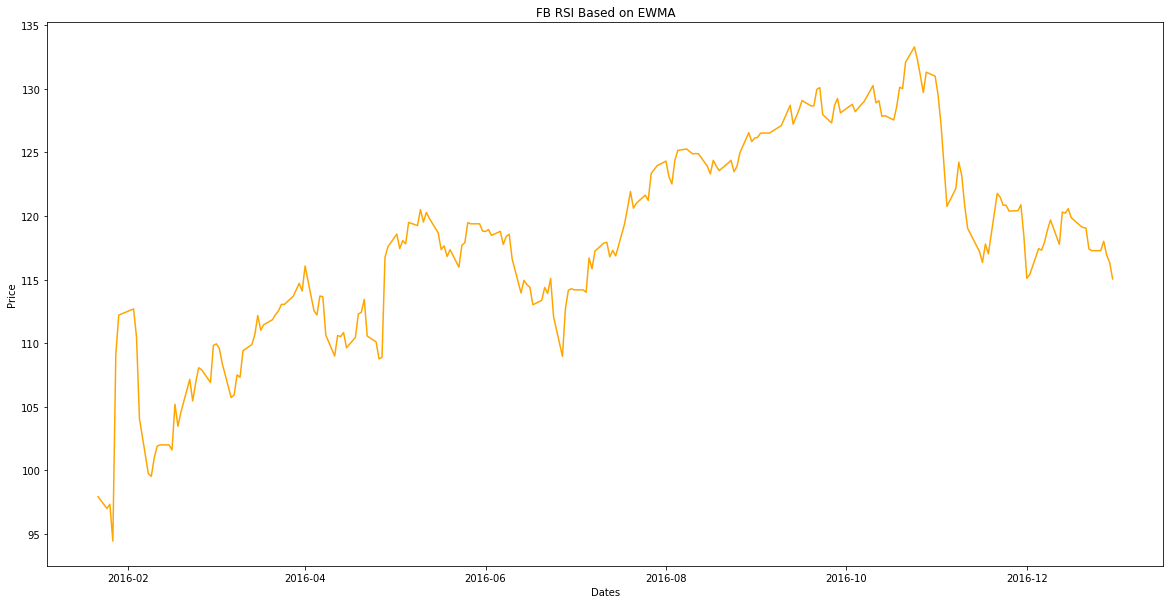

In [18]:
#FB RSI Based on EWMA
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB RSI Based on EWMA")
plt.plot(DatesEMA,EMA,color='orange')
plt.show()


<h3>Let's take a look at how our RSI Oscillators would perform and see what the return would be with and without them!</h3>

[9.146899501061057, 19.335691534369708, 19.317274349975673]


<function matplotlib.pyplot.show>

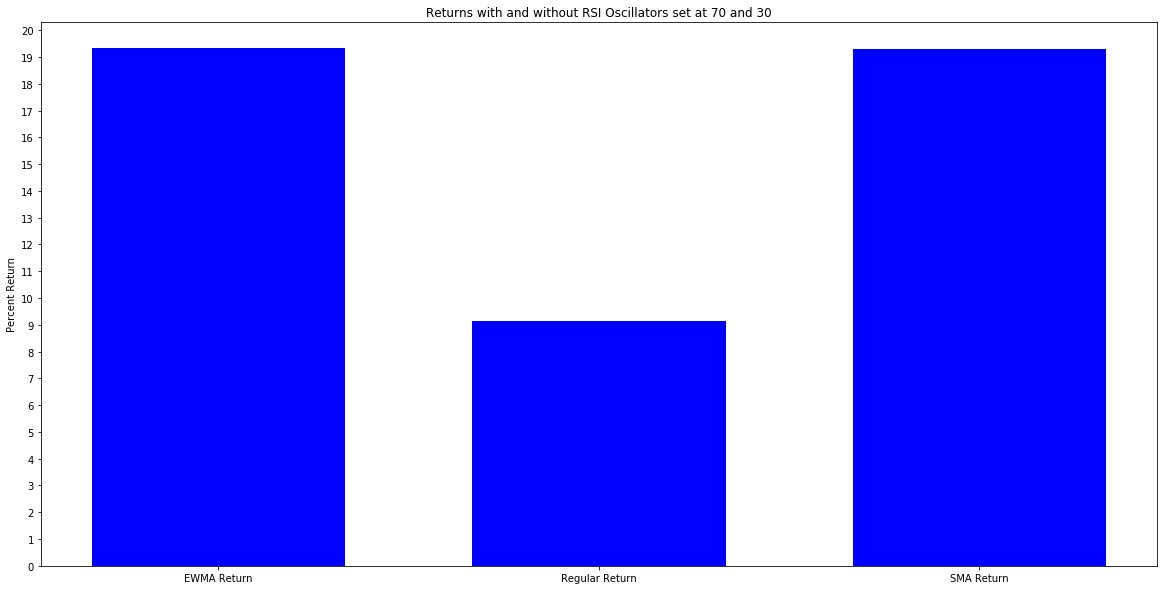

In [19]:
#plot a bar graph of returns to see which one performed the best with original trigger points and window length
object1 = sum(Total_Returns_year)
object2=  sum(SMA_Tot_Return)
object3 = sum(EMA_Tot_Return)
sums = [object1, object2, object3]
y = sums
print(y)
N = len(y)
x = ('Regular Return', 'EWMA Return', 'SMA Return')
width = 1/1.5
plt.figure(figsize = (20, 10))
plt.yticks(np.arange(0, 30, step = 1))
plt.bar(x, y, width, color='blue')
plt.title('Returns with and without RSI Oscillators set at 70 and 30')
plt.ylabel('Percent Return')
plt.show

<h3>Now, let's look at the RSI Oscillator with different trigger points. In an uptrend or bull market, the RSI tends to remain in the 40 to 90 range with the 40-50 zone acting as support. During a downtrend or bear market the RSI tends to stay between the 10 to 60 range with the 50-60 zone acting as resistance. These ranges will vary depending on the RSI settings and the strength of the security’s or market’s underlying trend. We will consider above 80 being overbought and under 20 being under bought to determine how that change effects our buy and sell points. </h3>

<h3>The window length means the time period we are looking at. It was originally set to 14 days, let's set that to 16 and see how that effects our returns.</h3>

In [20]:
# Window length for moving average
window_length = 16
#RSI Oscillator with above 90 being overbought and under 40 being underbought 
#Ben needs to change the values and plot!!!
# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the EWMA
roll_up1 = pd.stats.moments.ewma(up, window_length)
roll_down1 = pd.stats.moments.ewma(down.abs(), window_length)

# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

# Calculate the SMA
roll_up2 = pd.rolling_mean(up, window_length)
roll_down2 = pd.rolling_mean(down.abs(), window_length)

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

df2['RSI1']=RSI2
df2['RSI2']=RSI1
df2=df2.dropna(axis=0)

#find the rows that only have rsi between RSI 25 and 80 for Simple Moving Average
SMA=[]
EMA=[]
DatesSMA=[]
DatesEMA=[]
#find the rows that only have rsi between RSI 25 and 80 for Simple Moving Average
for index, row in df2.iterrows():
    if row['RSI1']>80 and row['RSI1']<25:
        continue
    elif row['RSI1']>25 and row['RSI1']<80:
        DatesSMA.append(index[1:])
        SMA.append(row['Close'])
#find the rows that only have rsi between RSI 25 and 80 for Exponential Weighted Moving Average
for index, row in df2.iterrows():
    if row['RSI2']>80 and row['RSI2']<25:
        continue
    elif row['RSI2']>25 and row['RSI2']<80:
        DatesEMA.append(index[1:])
        EMA.append(row['Close'])

#find the total percentage returns for the year

df3['Actual_Return']=((df3['Close']-df3['Close'].shift(1))/(df3['Close'])*100)
Total_Returns_year=df3['Actual_Return']
Total_Returns_year[np.isnan(Total_Returns_year)]=3.5
#print(Total_Returns_year)
print("Total return for year",sum(Total_Returns_year),"%")

Total return for year 9.146899501061057 %


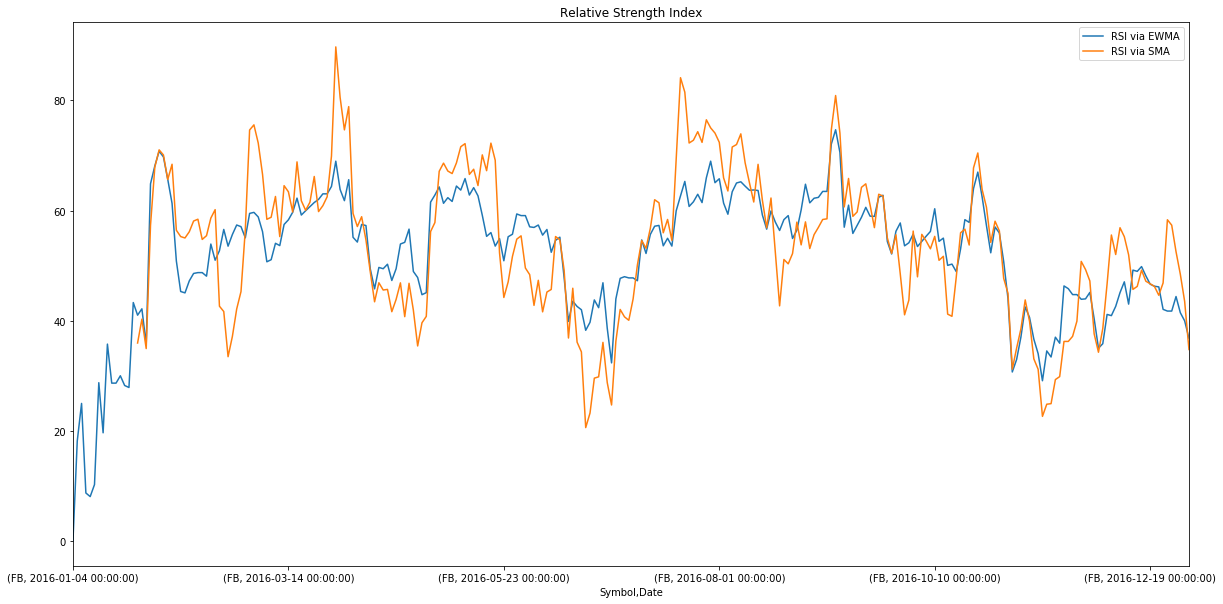

In [21]:
RSI1.plot(title='Relative Strength Index',figsize = (20, 10))
RSI2.plot(figsize = (20, 10))
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()

In [22]:
#total returns for RSI based on SMA
SMA_Tot_Return=[]
for i in range(len(SMA)-1):
    SMA_Tot_Return.append((SMA[i+1]-SMA[i])/SMA[i]*100)
print("Total return for year SMA",sum(SMA_Tot_Return),"%")

Total return for year SMA 20.28195633428244 %


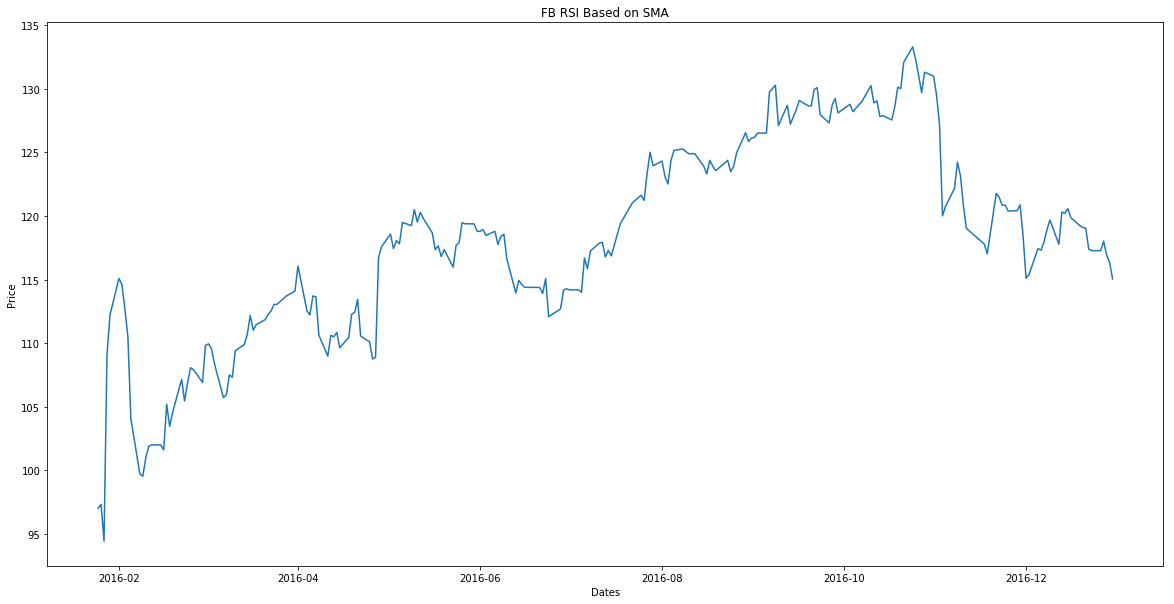

In [23]:
# Compare graphically
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB RSI Based on SMA")
plt.plot(DatesSMA,SMA)
plt.show()

In [24]:
#total returns for RSI based on EWMA
#print(EMA)
EMA_Tot_Return=[]
#print(EMA)
for i in range(len(EMA)-1):
    EMA_Tot_Return.append((EMA[i+1]-EMA[i])/EMA[i]*100)
print("Total return for year EWMA",sum(EMA_Tot_Return),"%")

Total return for year EWMA 20.51550945242786 %


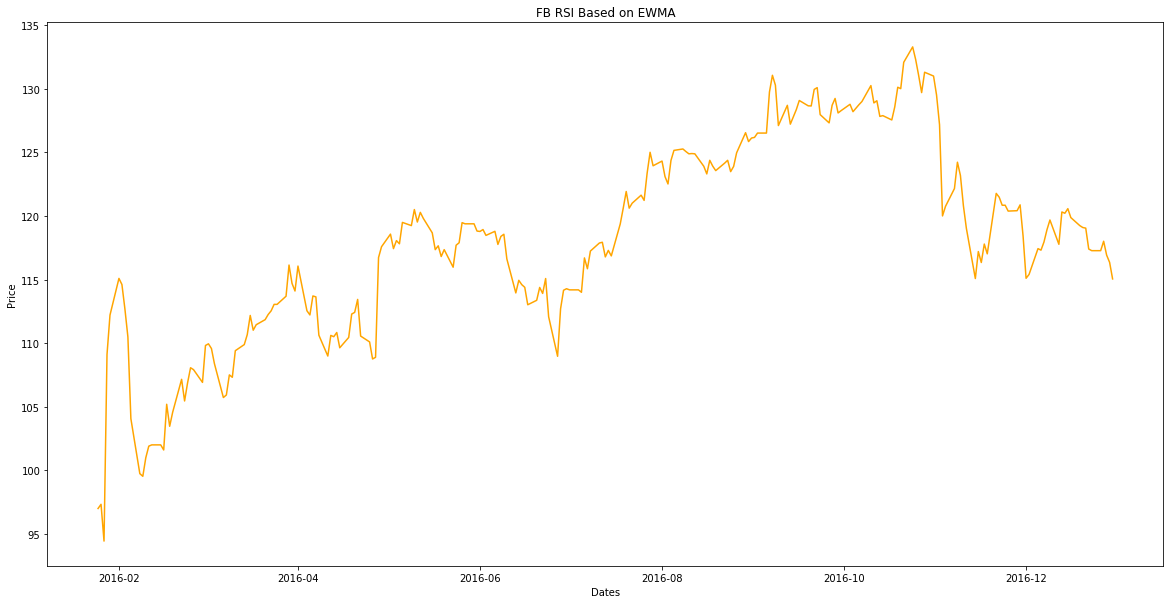

In [25]:
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB RSI Based on EWMA")
plt.plot(DatesEMA,EMA,color='orange')
plt.show()


[9.146899501061057, 20.28195633428244, 20.51550945242786]


<function matplotlib.pyplot.show>

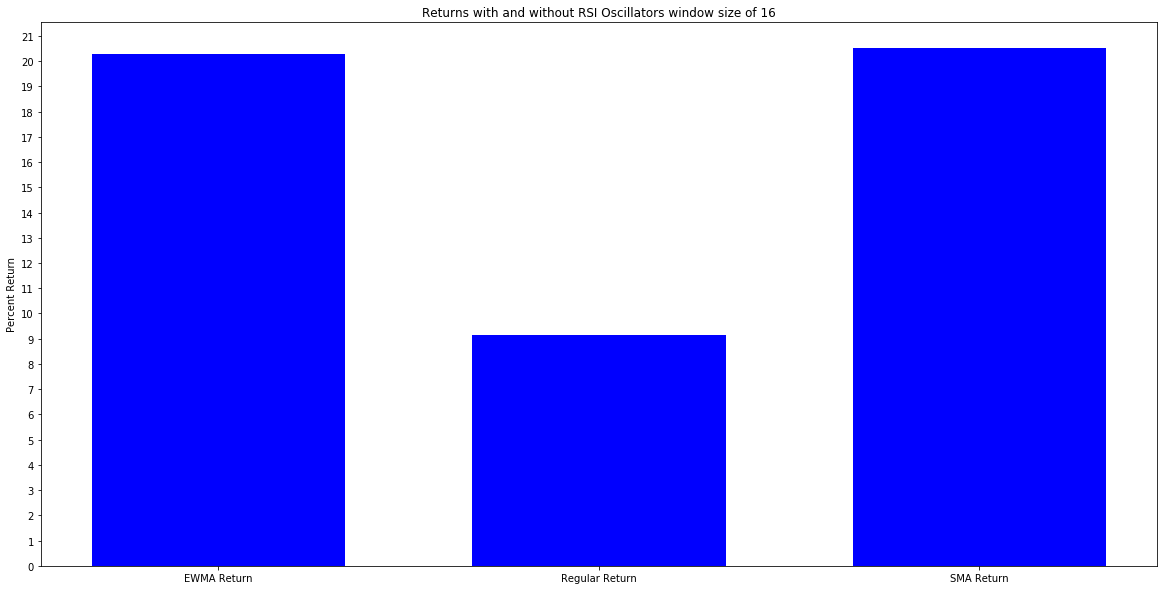

In [26]:
#plot a bar graph of returns to see which one performed the best with new trigger points and window length
object1 = sum(Total_Returns_year)
object2=  sum(SMA_Tot_Return)
object3 = sum(EMA_Tot_Return)
sums = [object1, object2, object3]
y = sums
print(y)
N = len(y)
x = ('Regular Return', 'EWMA Return', 'SMA Return')
width = 1/1.5
plt.figure(figsize = (20, 10))
plt.yticks(np.arange(0, 30, step = 1))
plt.bar(x, y, width, color='blue')
plt.title('Returns with and without RSI Oscillators window size of 16')
plt.ylabel('Percent Return')
plt.show

<h3>It looks like the window size and trigger points to affect the return.  We would have to look at more stocks and different window sizes to find the best window size.</h3>

<h3>MACD (Moving Average Convergence/Divergence)</h3>

The Moving Average Convergence/Divergence indicator is a momentum oscillator primarily used to trade trends. Although it is an oscillator, it is not typically used to identify over bought or oversold conditions. It appears on the chart as two lines which oscillate without boundaries. The crossover of the two lines give trading signals similar to a two moving average system.

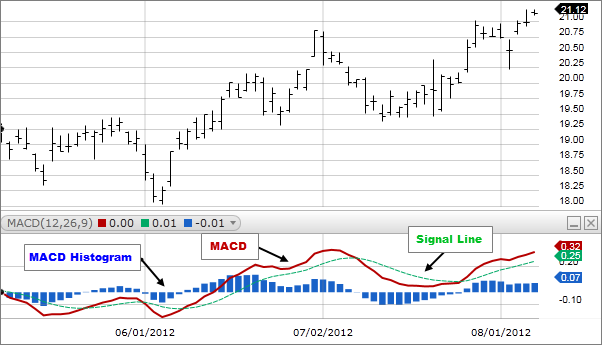

MACD crossing above zero is considered bullish, while crossing below zero is bearish. Secondly, when MACD turns up from below zero it is considered bullish. When it turns down from above zero it is considered bearish.

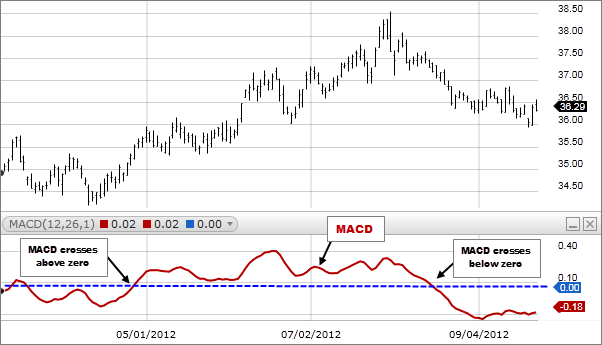

When the MACD line crosses from above to below the signal line, the indicator is considered bearish. The further above the zero line the stronger the signal.

An approximated MACD can be calculated by subtracting the value of a 26 period Exponential Moving Average (EMA) from a 12 period EMA. The shorter EMA is constantly converging toward, and diverging away from, the longer EMA. This causes MACD to oscillate around the zero level. A signal line is created with a 9 period EMA of the MACD line.

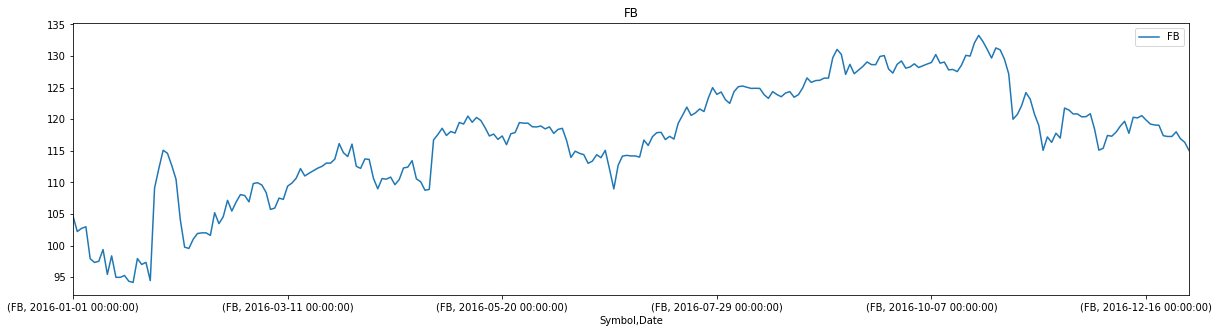

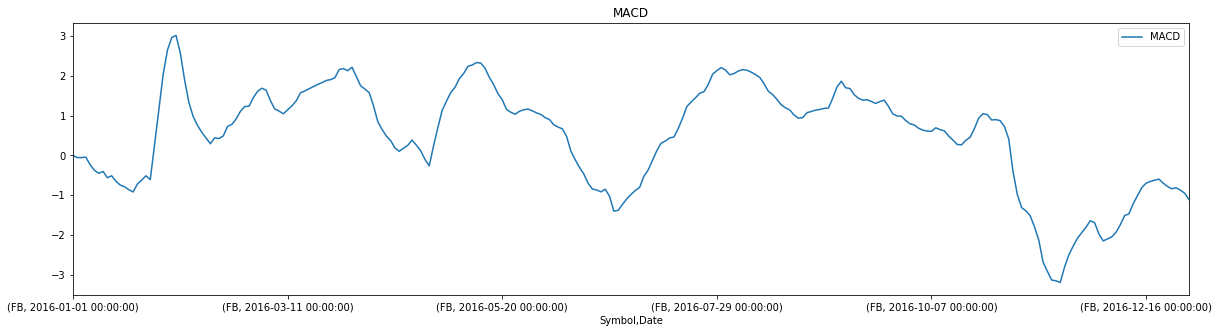

In [27]:
#MACD (Moving Average Convergence/Divergence)
names = ['FB']
def get_px(stock, start, end): 
     return web.get_data_morningstar(stock, start, end)['Close']
px = pd.DataFrame({n: get_px(n, '1/1/2016', '12/31/2016') for n in names})
px['26 ema'] = pd.ewma(px["FB"], span=26)
px['12 ema'] = pd.ewma(px["FB"], span=12)
px['MACD'] = (px['12 ema'] - px['26 ema'])
px.plot(y= ['FB'], title='FB',figsize = (20, 5))
px.plot(y= ['MACD'], title='MACD',figsize = (20, 5))


In [28]:
MACD=[]
DatesMACD=[]
#find the rows for MACD based on macd above and below 0 or 2.0
for index, row in px.iterrows():
    if row['MACD']>2 and row['MACD']<0:
        continue
    elif row['MACD']>0 and row['MACD']<2.0:
        DatesMACD.append(index[1:])
        MACD.append(row['FB'])
#total returns for RSI based on SMA
MACD_Tot_Return=[]
for i in range(len(MACD)-1):
    MACD_Tot_Return.append((MACD[i+1]-MACD[i])/MACD[i]*100)
print("Total return for year MACD",sum(MACD_Tot_Return),"%")

Total return for year MACD 17.09483716858107 %


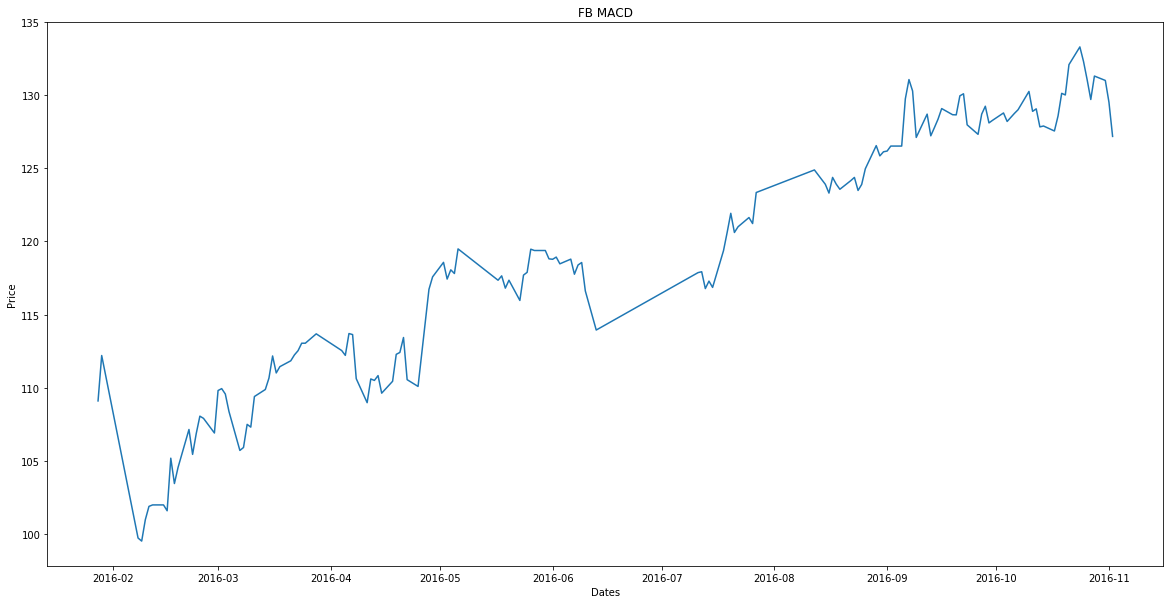

In [29]:
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB MACD")
plt.plot(DatesMACD,MACD)
plt.show()

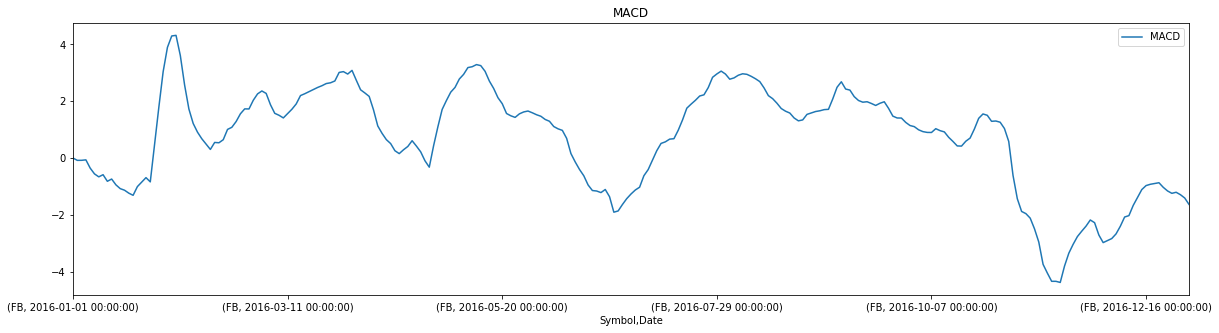

In [30]:
#altered MACD
px['30 ema'] = pd.ewma(px["FB"], span=30)
px['10 ema'] = pd.ewma(px["FB"], span=10)
px['MACD'] = (px['10 ema'] - px['30 ema'])
px.plot(y= ['MACD'], title='MACD',figsize = (20, 5))

In [31]:
MACDALT=[]
DatesMACDALT=[]
#find the rows for MACD based on macd above and below -.5 or 2.5
for index, row in px.iterrows():
    if row['MACD']>2.5 and row['MACD']<=-.5:
        continue
    elif row['MACD']>-.5 and row['MACD']<2.5:
        DatesMACDALT.append(index[1:])
        MACDALT.append(row['FB'])
#print(MACDALT)
#total returns for MACDALT
MACD_Tot_ReturnALT=[]
for i in range(len(MACDALT)-1):
    MACD_Tot_ReturnALT.append((MACDALT[i+1]-MACDALT[i])/MACDALT[i]*100)
print("Total return for year MACDALT",sum(MACD_Tot_ReturnALT),"%")

Total return for year MACDALT 22.053872149068493 %


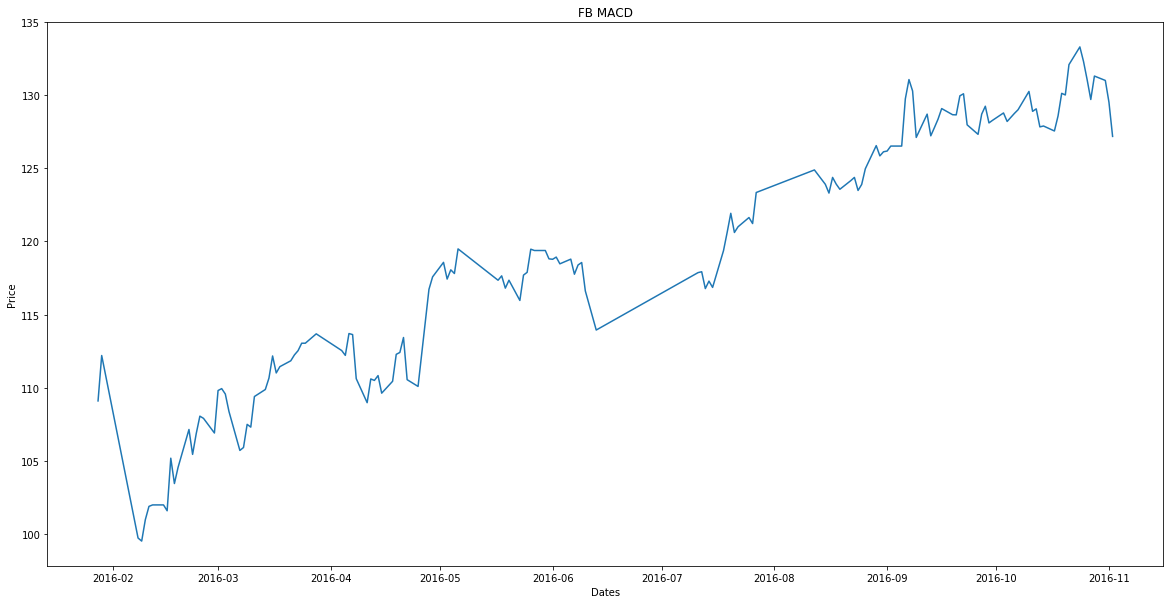

In [32]:
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB MACD")
plt.plot(DatesMACD,MACD)
plt.show()

<h3>Stochastic </h3>

The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods. The indicator can range from 0 to 100.

The closing price tends to close near the high in an uptrend and near the low in a downtrend. If the closing price then slips away from the high or the low, then momentum is slowing. Stochastics are most effective in broad trading ranges or slow moving trends. Two lines are graphed, the fast oscillating %K and a moving average of %K, commonly referred to as %D.

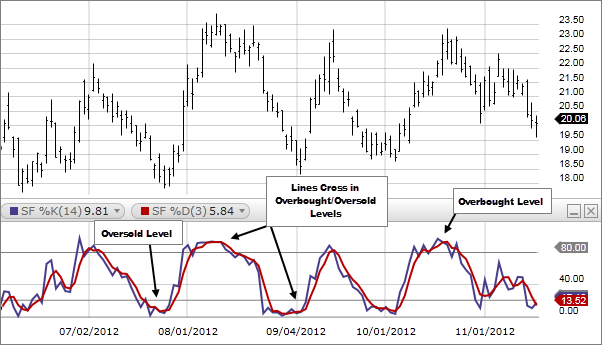

Generally, the area above 80 indicates an overbought region, while the area below 20 is considered an oversold region. A sell signal is given when the oscillator is above the 80 level and then crosses back below 80. Conversely, a buy signal is given when the oscillator is below 20 and then crosses back above 20. 80 and 20 are the most common levels used but can be adjusted as needed.

A crossover signal occurs when the two lines cross in the overbought or oversold region. A sell signal occurs when a decreasing %K line crosses below the %D line in the overbought region. Conversely, a buy signal occurs when an increasing %K line crosses above the %D line in the oversold region.

Divergences form when a new high or low in price is not confirmed by the Stochastic Oscillator. A bullish divergence forms when price make a lower low, but the Stochastic Oscillator forms a higher low. This indicates less downward momentum that could foreshadow a bullish reversal. A bearish divergence forms when price makes a higher high, but the Stochastic Oscillator forms a lower high. This shows less upward momentum that could foreshadow a bearish reversal.

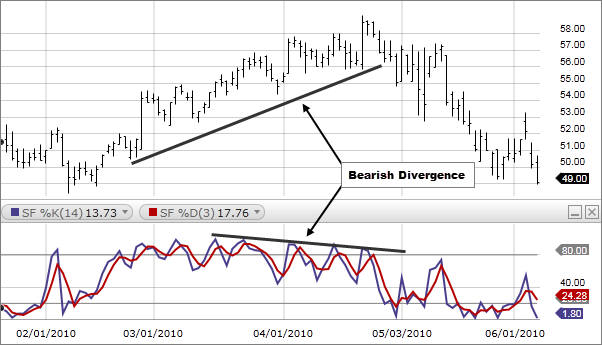

Calculation for %K

%K= 100[(C - L14) / H14 – L14)] 
Where: 
C = Latest Close 
L14 = Lowest low for the last 14 periods. 
H14 = Highest high for the same 14 periods

Calculation for %D

%D = simple moving average of %K (3 period simple moving average is the most common)


                    Close     High       Low         %K         %D
Symbol Date                                                       
FB     2016-12-26  117.27  117.270  117.2700  15.645161  20.883226
       2016-12-27  118.01  118.680  116.8640  27.580645  19.623656
       2016-12-28  116.92  118.250  116.6500  10.000000  17.741935
       2016-12-29  116.35  117.531  116.0600   4.503106  14.027917
       2016-12-30  115.05  116.830  114.7739   3.573601   6.025569


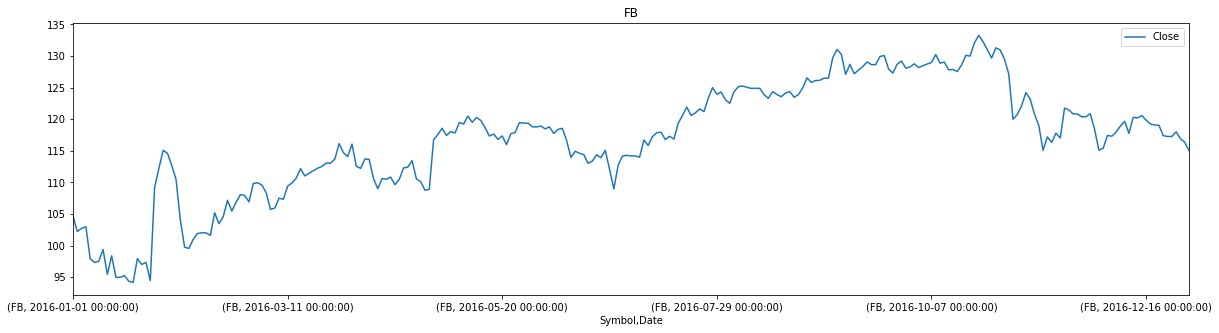

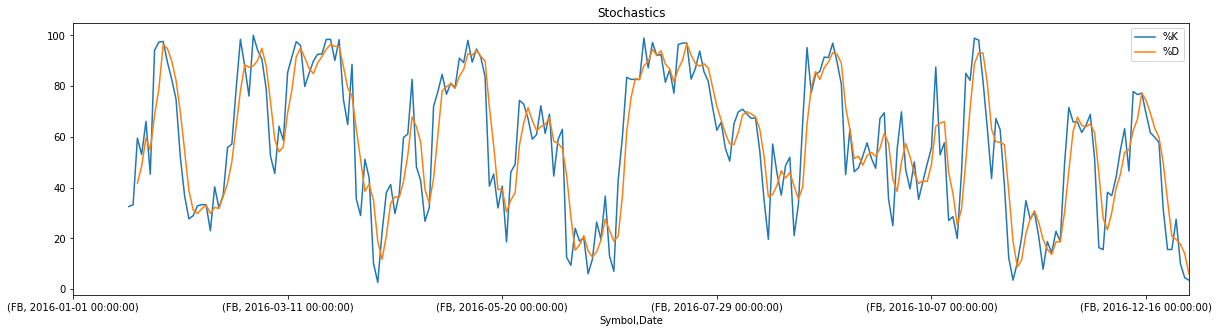

In [33]:
#stochastics model
def get_stock(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['Close']

def get_high(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['High']

def get_low(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['Low']

def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
print(df.tail())

df.plot(y=['Close'],title='FB', figsize = (20, 5))
df.plot(y=['%K', '%D'],title='Stochastics', figsize = (20, 5))


In [34]:
K=[]
D=[]
DatesK=[]
DatesD=[]
#find the rows that only have %K between  20 and 80
for index, row in df.iterrows():
    if row['%K']>80 and row['%K']<20:
        continue
    elif row['%K']>20 and row['%K']<80:
        DatesK.append(index[1:])
        K.append(row['Close'])
#find the rows that only have %D between 20 and 80
for index, row in df.iterrows():
    if row['%D']>80 and row['%D']<20:
        continue
    elif row['%D']>20 and row['%D']<80:
        DatesD.append(index[1:])
        D.append(row['Close'])

In [35]:
#total returns for %K 
K_Tot_Return=[]
for i in range(len(K)-1):
    K_Tot_Return.append((K[i+1]-K[i])/K[i]*100)
print("Total return for year %K",sum(K_Tot_Return),"%")


Total return for year %K 25.59347268930077 %


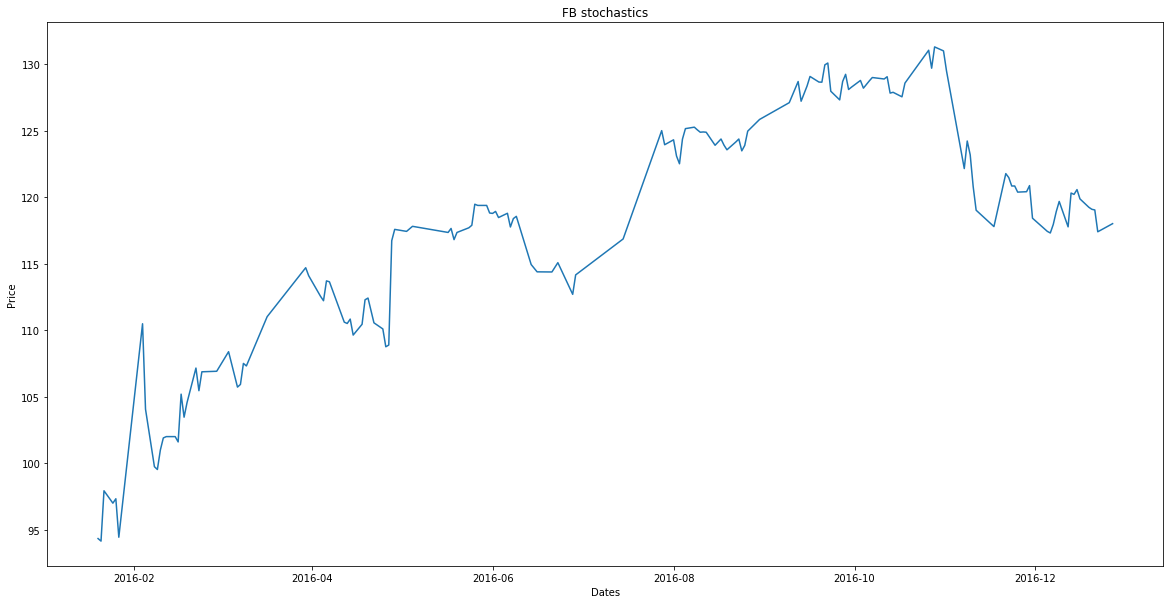

In [36]:
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB stochastics")
plt.plot(DatesK,K)
plt.show()

In [37]:
#total returns for %D
D_Tot_Return=[]
for i in range(len(D)-1):
    D_Tot_Return.append((D[i+1]-D[i])/D[i]*100)
print("Total return for the year %D",sum(D_Tot_Return),"%")

Total return for the year %D 21.207906716244494 %


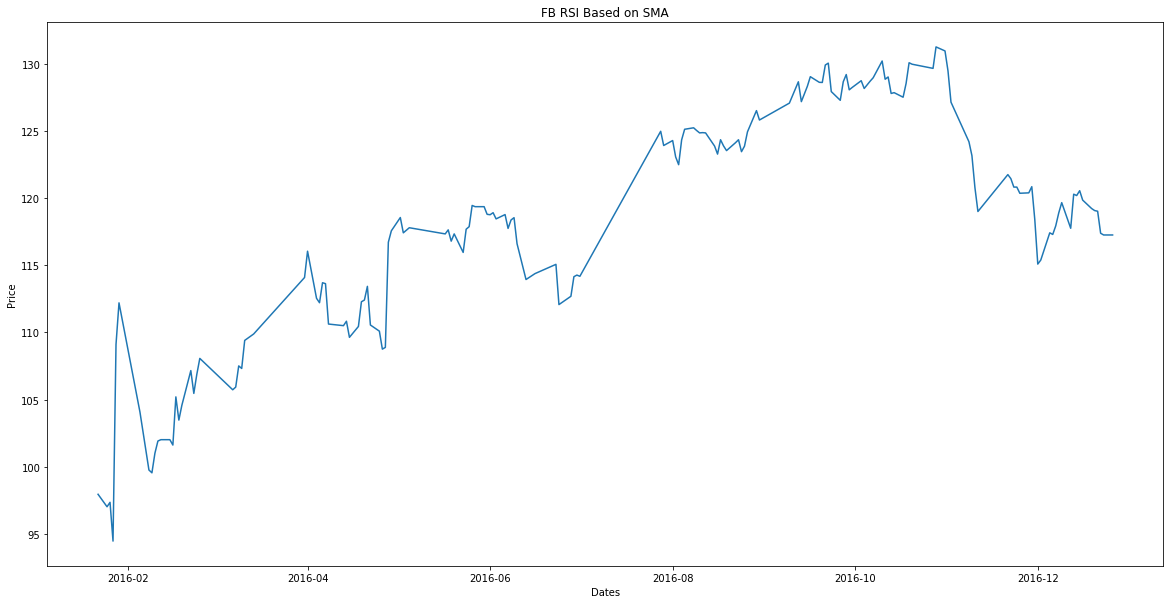

In [38]:
# Compare graphically
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB RSI Based on SMA")
plt.plot(DatesD,D)
plt.show()

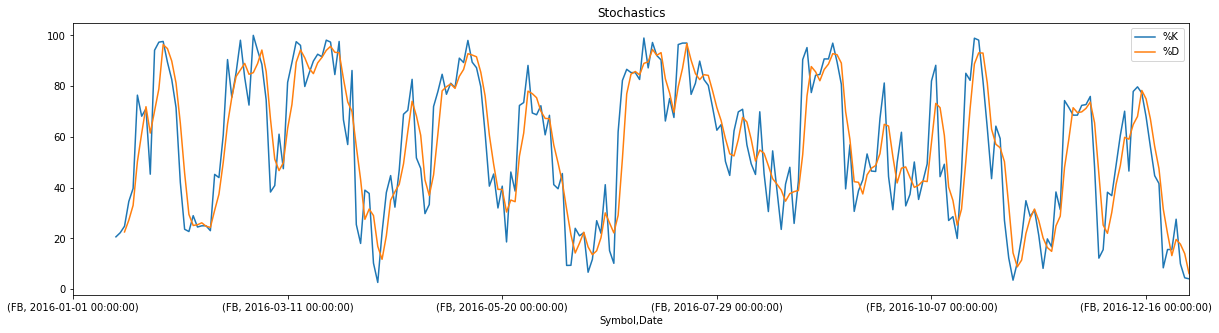

In [39]:
#alter the time span to 16
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 11)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 11)
df.plot(y=['%K', '%D'],title='Stochastics', figsize = (20, 5))

In [40]:
K=[]
D=[]
DatesK=[]
DatesD=[]
#find the rows that only have %K between  40 and 80
for index, row in df.iterrows():
    if row['%K']>80 and row['%K']<40:
        continue
    elif row['%K']>40 and row['%K']<80:
        DatesK.append(index[1:])
        K.append(row['Close'])
#find the rows that only have %D between 30 and 80
for index, row in df.iterrows():
    if row['%D']>80 and row['%D']<40:
        continue
    elif row['%D']>40 and row['%D']<80:
        DatesD.append(index[1:])
        D.append(row['Close'])

In [41]:
#total returns for %K 
K_Tot_Return=[]
for i in range(len(K)-1):
    K_Tot_Return.append((K[i+1]-K[i])/K[i]*100)
print("Total return for year %K",sum(K_Tot_Return),"%")

Total return for year %K 22.222459121932893 %


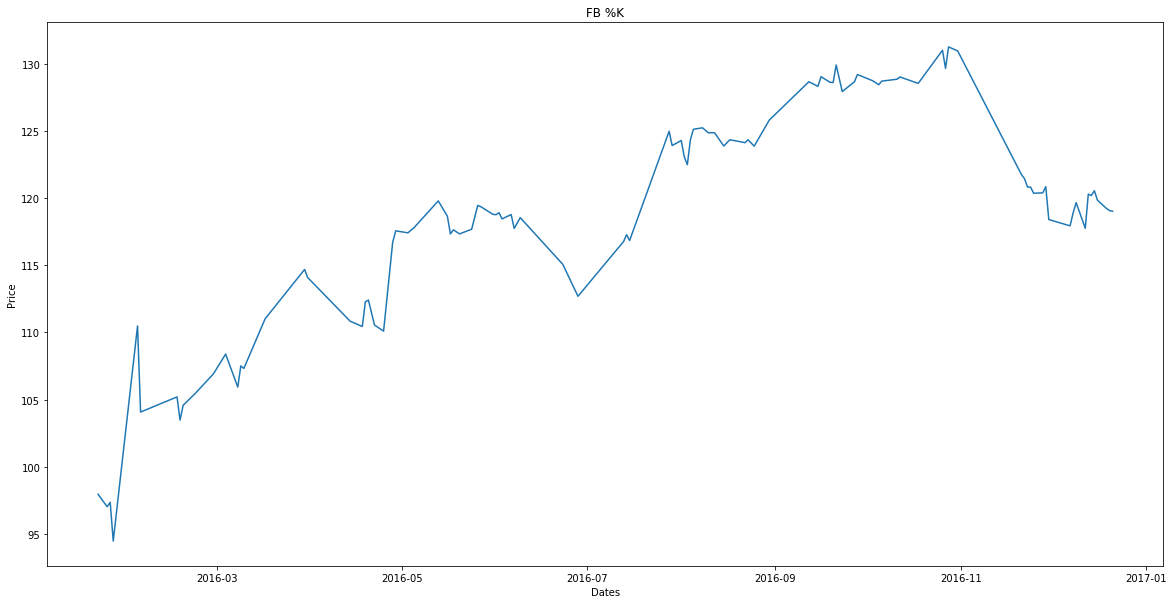

In [42]:
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB %K")
plt.plot(DatesK,K)
plt.show()

In [43]:
#total returns for %D
D_Tot_Return=[]
for i in range(len(D)-1):
    D_Tot_Return.append((D[i+1]-D[i])/D[i]*100)
print("Total return for year %D",sum(D_Tot_Return),"%")

Total return for year %D 22.45124217718528 %


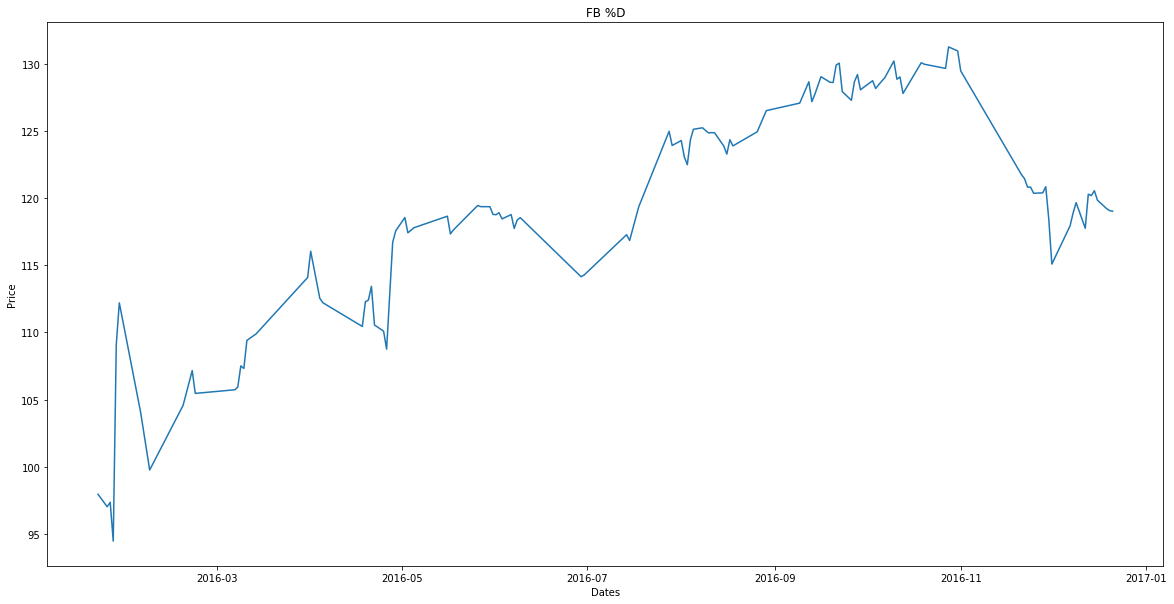

In [44]:
# Compare graphically
plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB %D")
plt.plot(DatesD,D)
plt.show()

<h3>Our final model is the Force Index</h3>

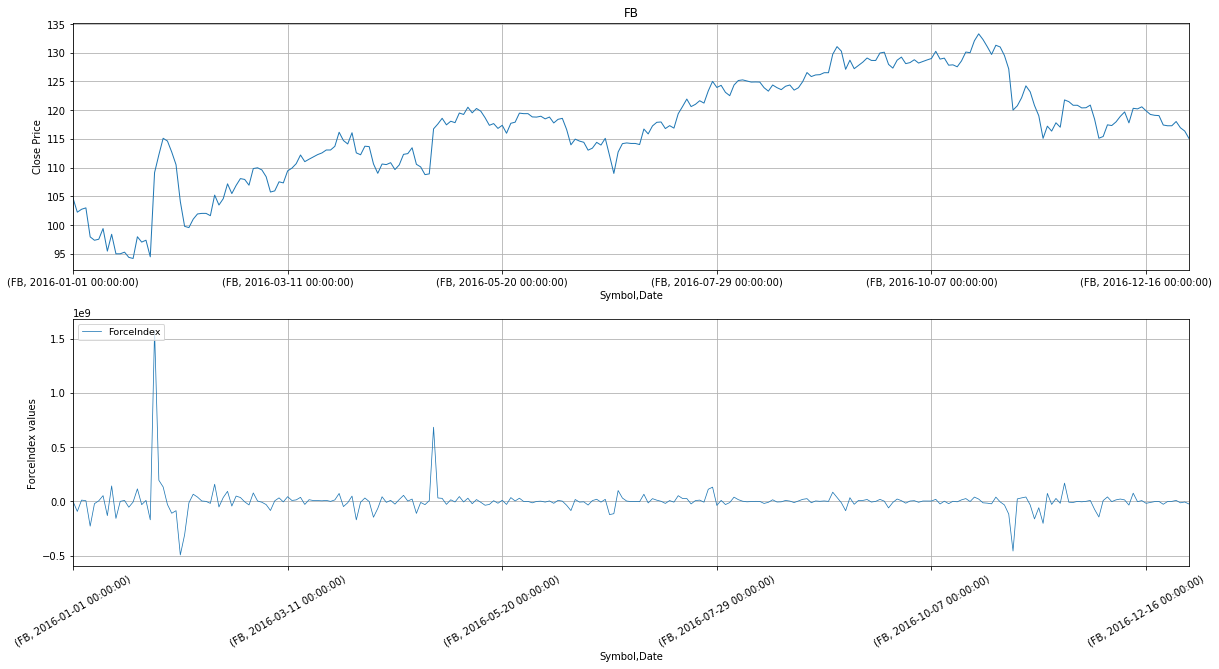

In [45]:
#Osillator based on volume
#Force index
def ForceIndex(data, ndays): 
 FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
 data = data.join(FI) 
 return data


# Retrieve the FB Inc. data from MorningStar finance:
data = web.DataReader('FB',data_source='morningstar',start='1/1/2016', end='31/12/2016')
data = pd.DataFrame(data)

# Compute the Force Index for FB
n = 1
FB_ForceIndex = ForceIndex(data,n)
FB_ForceIndex[np.isnan(FB_ForceIndex)]=0.0
ForceIndex = FB_ForceIndex['ForceIndex']

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(2,1,1)
ax.set_xticklabels([])
data.Close.plot(lw=1)
plt.title('FB')
plt.ylabel('Close Price')
plt.grid(True)
bx=fig.add_subplot(2,1,2)
ForceIndex.plot(lw=0.75,linestyle='-',label='ForceIndex')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('ForceIndex values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()

In [46]:
ForceIndex=[]
#find the rows that on forceindex between -.5 and .5
for index, row in FB_ForceIndex.iterrows():
    if row['ForceIndex']>.5 and row['ForceIndex']<-.30:
        continue
    elif row['ForceIndex']>-.30 and row['ForceIndex']<.5:
        DatesD.append(index[1:])
        ForceIndex.append(row['Close'])
#total returns for %K 
Force_Tot_Return=[]
for i in range(len(ForceIndex)-1):
    Force_Tot_Return.append((ForceIndex[i+1]-ForceIndex[i])/ForceIndex[i]*100)
print("Total return for year Force Index",sum(Force_Tot_Return),"%")

Total return for year Force Index 13.581471482948833 %


<h3>Backtest of Best return oscillator %K </h3>

We will now run a test of two stocks from 2010 and 2016 using Stochastics model %K to see if our model consistently out performs regular returns of the stock.
We chose both Apple and Facebook for the back test.

                    Close     High       Low         %K
Symbol Date                                            
FB     2016-12-26  117.27  117.270  117.2700  15.645161
       2016-12-27  118.01  118.680  116.8640  27.580645
       2016-12-28  116.92  118.250  116.6500  10.000000
       2016-12-29  116.35  117.531  116.0600   4.503106
       2016-12-30  115.05  116.830  114.7739   3.573601
Average Yearly returns FB from 2010 through 2016 37.34597843134277 %
Average Yearly returns %K from 2010 through 2016  91.38211395533293 %


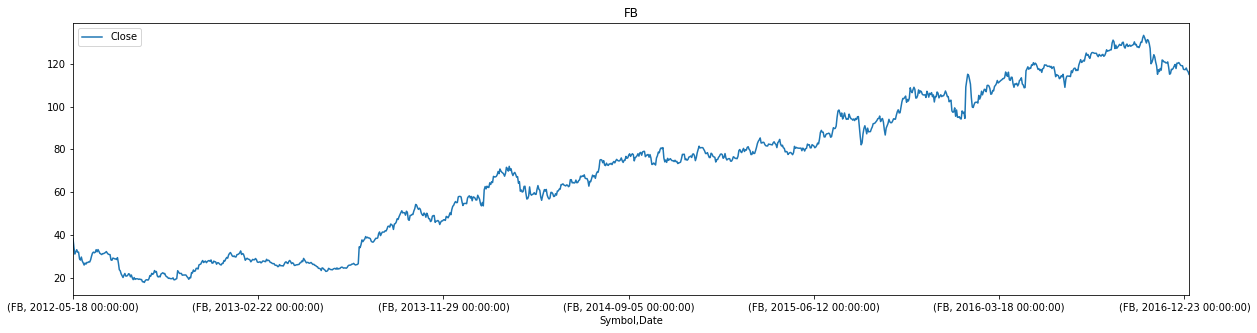

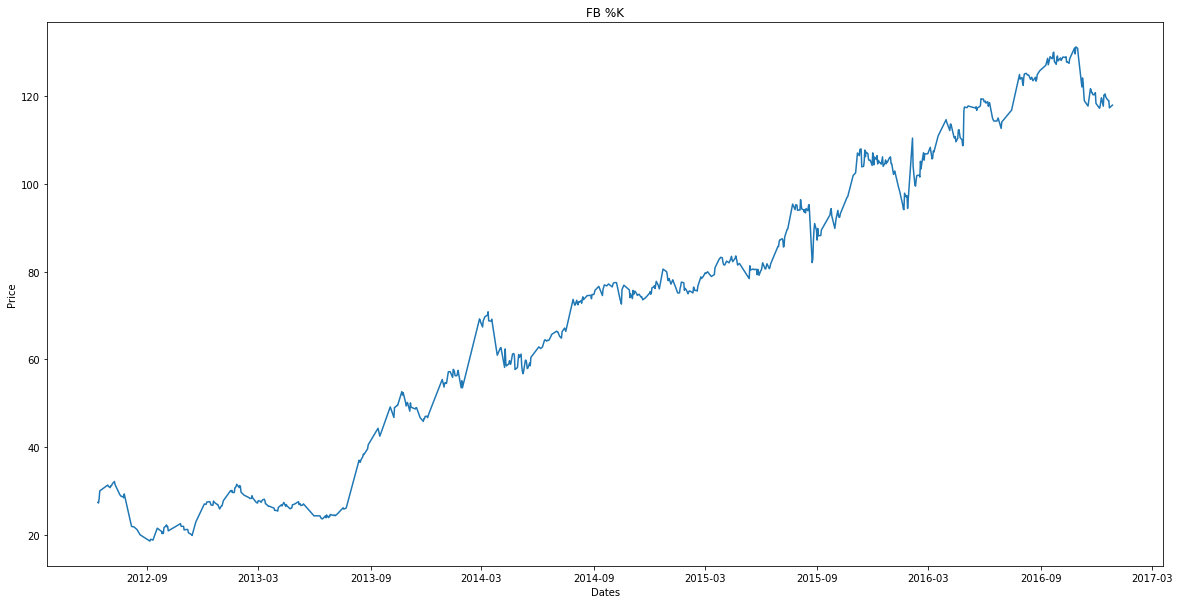

In [47]:
#stochastics model
def get_stock(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['Close']

def get_high(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['High']

def get_low(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['Low']

def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

df = pd.DataFrame(get_stock('FB', '1/1/2010', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2010', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2010', '12/31/2016')
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
print(df.tail())

df.plot(y=['Close'],title='FB', figsize = (20, 5))


K=[]
DatesK=[]
#find the rows that only have %K between  20 and 80
for index, row in df.iterrows():
    if row['%K']>80 and row['%K']<20:
        continue
    elif row['%K']>20 and row['%K']<80:
        DatesK.append(index[1:])
        K.append(row['Close'])

#find the total percentage returns for the year
df['Actual_Return']=(((df['Close']-df['Close'].shift(1))/df['Close']*100)/2)
Total_Returns_year=df['Actual_Return']
Total_Returns_year[np.isnan(Total_Returns_year)]=0

print("Average Yearly returns FB from 2010 through 2016",sum(Total_Returns_year),"%")
#total returns for %K 
K_Tot_Return=[]
for i in range(len(K)-1):
    K_Tot_Return.append(((K[i+1]-K[i])/K[i]*100)/2)
print("Average Yearly returns %K from 2010 through 2016 ",sum(K_Tot_Return),"%")

plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("FB %K")
plt.plot(DatesK,K)
plt.show()

                    Close      High     Low         %K
Symbol Date                                           
AAPL   2016-12-26  116.52  116.5200  116.52  88.249400
       2016-12-27  117.26  117.8000  116.49  92.500000
       2016-12-28  116.76  118.0166  116.20  77.979883
       2016-12-29  116.73  117.1095  116.40  76.719864
       2016-12-30  115.82  117.2000  115.43  48.516383
Average Yearly returns Apple from 2010 through 2016 57.79848365929085 %
Average Yearly returns %K from 2010 through 2016  79.97745927313716 %


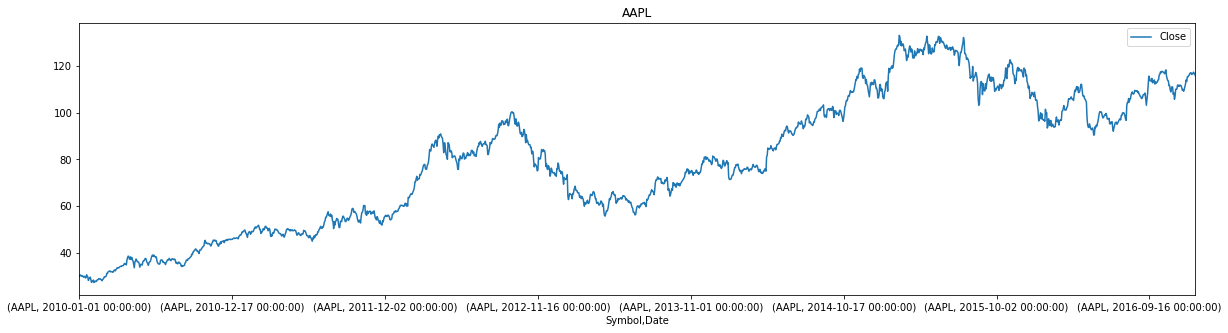

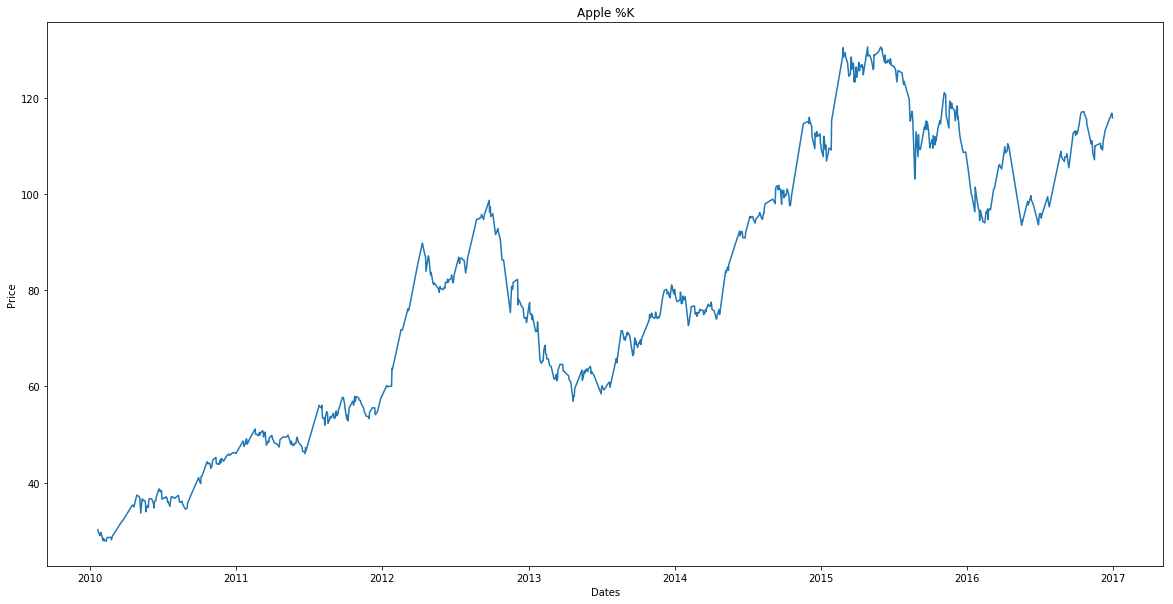

In [48]:
#stochastics model
def get_stock(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['Close']

def get_high(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['High']

def get_low(stock,start,end):
 return web.DataReader(stock,'morningstar',start,end)['Low']

def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

df = pd.DataFrame(get_stock('AAPL', '1/1/2010', '12/31/2016'))
df['High'] = get_high('AAPL', '1/1/2010', '12/31/2016')
df['Low'] = get_low('AAPL', '1/1/2010', '12/31/2016')
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
print(df.tail())

df.plot(y=['Close'],title='AAPL', figsize = (20, 5))


K=[]
DatesK=[]
#find the rows that only have %K between  20 and 80
for index, row in df.iterrows():
    if row['%K']>80 and row['%K']<20:
        continue
    elif row['%K']>20 and row['%K']<80:
        DatesK.append(index[1:])
        K.append(row['Close'])

#find the total percentage returns for the year
df['Actual_Return']=(((df['Close']-df['Close'].shift(1))/(df['Close'])*100)/2)
Total_Returns_year=df['Actual_Return']
Total_Returns_year[np.isnan(Total_Returns_year)]=2.5
#print(Total_Returns_year)
print("Average Yearly returns Apple from 2010 through 2016",sum(Total_Returns_year),"%")
#total returns for %K 
K_Tot_Return=[]
for i in range(len(K)-1):
    K_Tot_Return.append(((K[i+1]-K[i])/K[i]*100)/2)
print("Average Yearly returns %K from 2010 through 2016 ",sum(K_Tot_Return),"%")

plt.figure(figsize = (20, 10))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title("Apple %K")
plt.plot(DatesK,K)
plt.show()

<h3>Conclusion and Lessons Learned </h3>

From the data we collected, explored, and modeled it looks like our returns would be much higher if we use the oscillators.  Future work could involve combining several models together to see what the best fit would be and trying to identify when we need to adjust our trigger points from say 70/30 to 80/25. Maybe we could automatically adjust the trigger points based on other market conditions.

We believe this program would be useful to anyone who buys and sells stocks.

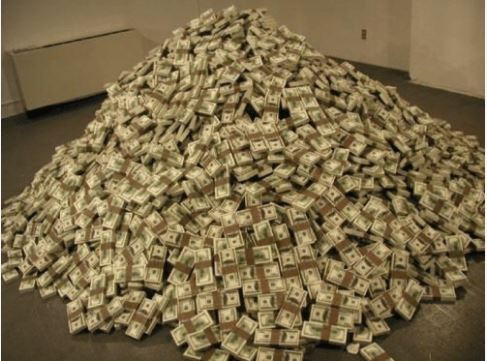